# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1341]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing the data and quick walk-through

In [1342]:
master_df = pd.read_csv('train.csv')
master_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1343]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1344]:
master_df.shape

(1460, 81)

#### Calculating the missing data percentage over all the columns

In [1345]:
(round(100* master_df.isnull().sum()/len(master_df),2)).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

### Data Cleaning and Preparation

Dropping the first four columns as the missing value percentage is more than 80%.

In [1346]:
master_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], inplace=True)
(round(100* master_df.isnull().sum()/len(master_df),2)).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

#### Now let's impute rest of the columns (with missing values) with relevant and suitable way.

In [1347]:
master_df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Imputing `FireplaceQu` with categorical data

In [1348]:
master_df['FireplaceQu'] = master_df['FireplaceQu'].fillna('No_Fireplace')
master_df['FireplaceQu'].value_counts()

No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [1349]:
master_df['FireplaceQu'].value_counts().sum()

1460

In [1350]:
master_df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

Imputing `LotFrontage` with median data

In [1351]:
master_df['LotFrontage'] = master_df['LotFrontage'].fillna(master_df['LotFrontage'].median())
master_df['LotFrontage'].isna().sum()

0

In [1352]:
master_df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

Imputing `GarageCond` with categorical data

In [1353]:
master_df['GarageCond'] = master_df['GarageCond'].fillna('No_Garage')
master_df['GarageCond'].value_counts()

TA           1326
No_Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [1354]:
master_df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Imputing `GarageType` `GarageYrBlt` `GarageFinish` `GarageQual` with categorical data

In [1355]:
master_df['GarageType'] = master_df['GarageType'].fillna('No_Garage')
master_df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

Let's derive some columns based on years to find the age of the Garage and renovation timeline.

In [1356]:
def customMethod1(x):
    if x<0:
        return 0
    else:
        return x
    
master_df['Garage_Old'] = (master_df['GarageYrBlt']-master_df['YearRemodAdd']).apply(customMethod1)
master_df['Garage_Old'] = master_df['Garage_Old'].fillna(0.0)
master_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig     ...     3SsnPorch ScreenPorch PoolArea MiscVal  \
0    AllPub    Inside     ...             0           0        0       0   
1    AllPub       FR2     ...             0           0        0       0   
2    AllPub    Inside     ...             0           0        0       0   
3    AllPub    Corner     ...             0           0        0       0   
4    AllPub       FR2     ...             0           0        0       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  Garage_Old  
0      2   2008        WD         Normal     208500         0.0  
1      5   2007        WD         Normal     181500         0.0  
2      9   2008        WD         Normal     223500         0.0  
3      2   2006        WD        Abnorml     140000        28.0  
4     12   2008        WD         Normal     250000         0.0  

[5 rows x 78 columns]

In [1357]:
#master_df['GarageYrBlt'] = master_df['GarageYrBlt'].fillna('No_Garage')
#master_df['GarageYrBlt'].value_counts()

In [1358]:
master_df['GarageFinish'] = master_df['GarageFinish'].fillna('No_Garage')
master_df['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No_Garage     81
Name: GarageFinish, dtype: int64

In [1359]:
master_df['GarageQual'] = master_df['GarageQual'].fillna('No_Garage')
master_df['GarageQual'].value_counts()

TA           1311
No_Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

Imputing `BsmtExposure` `BsmtFinType2` `BsmtFinType1` `BsmtCond` `BsmtQual` with categorical data

In [1360]:
master_df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [1361]:
master_df['BsmtExposure'] = master_df['BsmtExposure'].fillna('No_Basement')
master_df['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64

In [1362]:
master_df['BsmtFinType2'] = master_df['BsmtFinType2'].fillna('No_Basement')
master_df['BsmtFinType2'].value_counts()

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [1363]:
master_df['BsmtFinType1'] = master_df['BsmtFinType1'].fillna('No_Basement')
master_df['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [1364]:
master_df['BsmtCond'] = master_df['BsmtCond'].fillna('No_Basement')
master_df['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [1365]:
master_df['BsmtQual'] = master_df['BsmtQual'].fillna('No_Basement')
master_df['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

Imputing `MasVnrArea` with 0.0 which indicates no existance of this area and imputing `MasVnrType` `Electrical` with categorical data

In [1366]:
master_df['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [1367]:
master_df['MasVnrArea'] = master_df['MasVnrArea'].fillna(0.0)
master_df['MasVnrArea'].value_counts()

0.0       869
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [1368]:
master_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1369]:
master_df['MasVnrType'] = master_df['MasVnrType'].fillna('None')
master_df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1370]:
master_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1371]:
master_df['Electrical'] = master_df['Electrical'].fillna('Not_available')
master_df['Electrical'].value_counts()

SBrkr            1334
FuseA              94
FuseF              27
FuseP               3
Not_available       1
Mix                 1
Name: Electrical, dtype: int64

Let's look at the relation between the variable using a pairplot

<Figure size 1152x720 with 0 Axes>

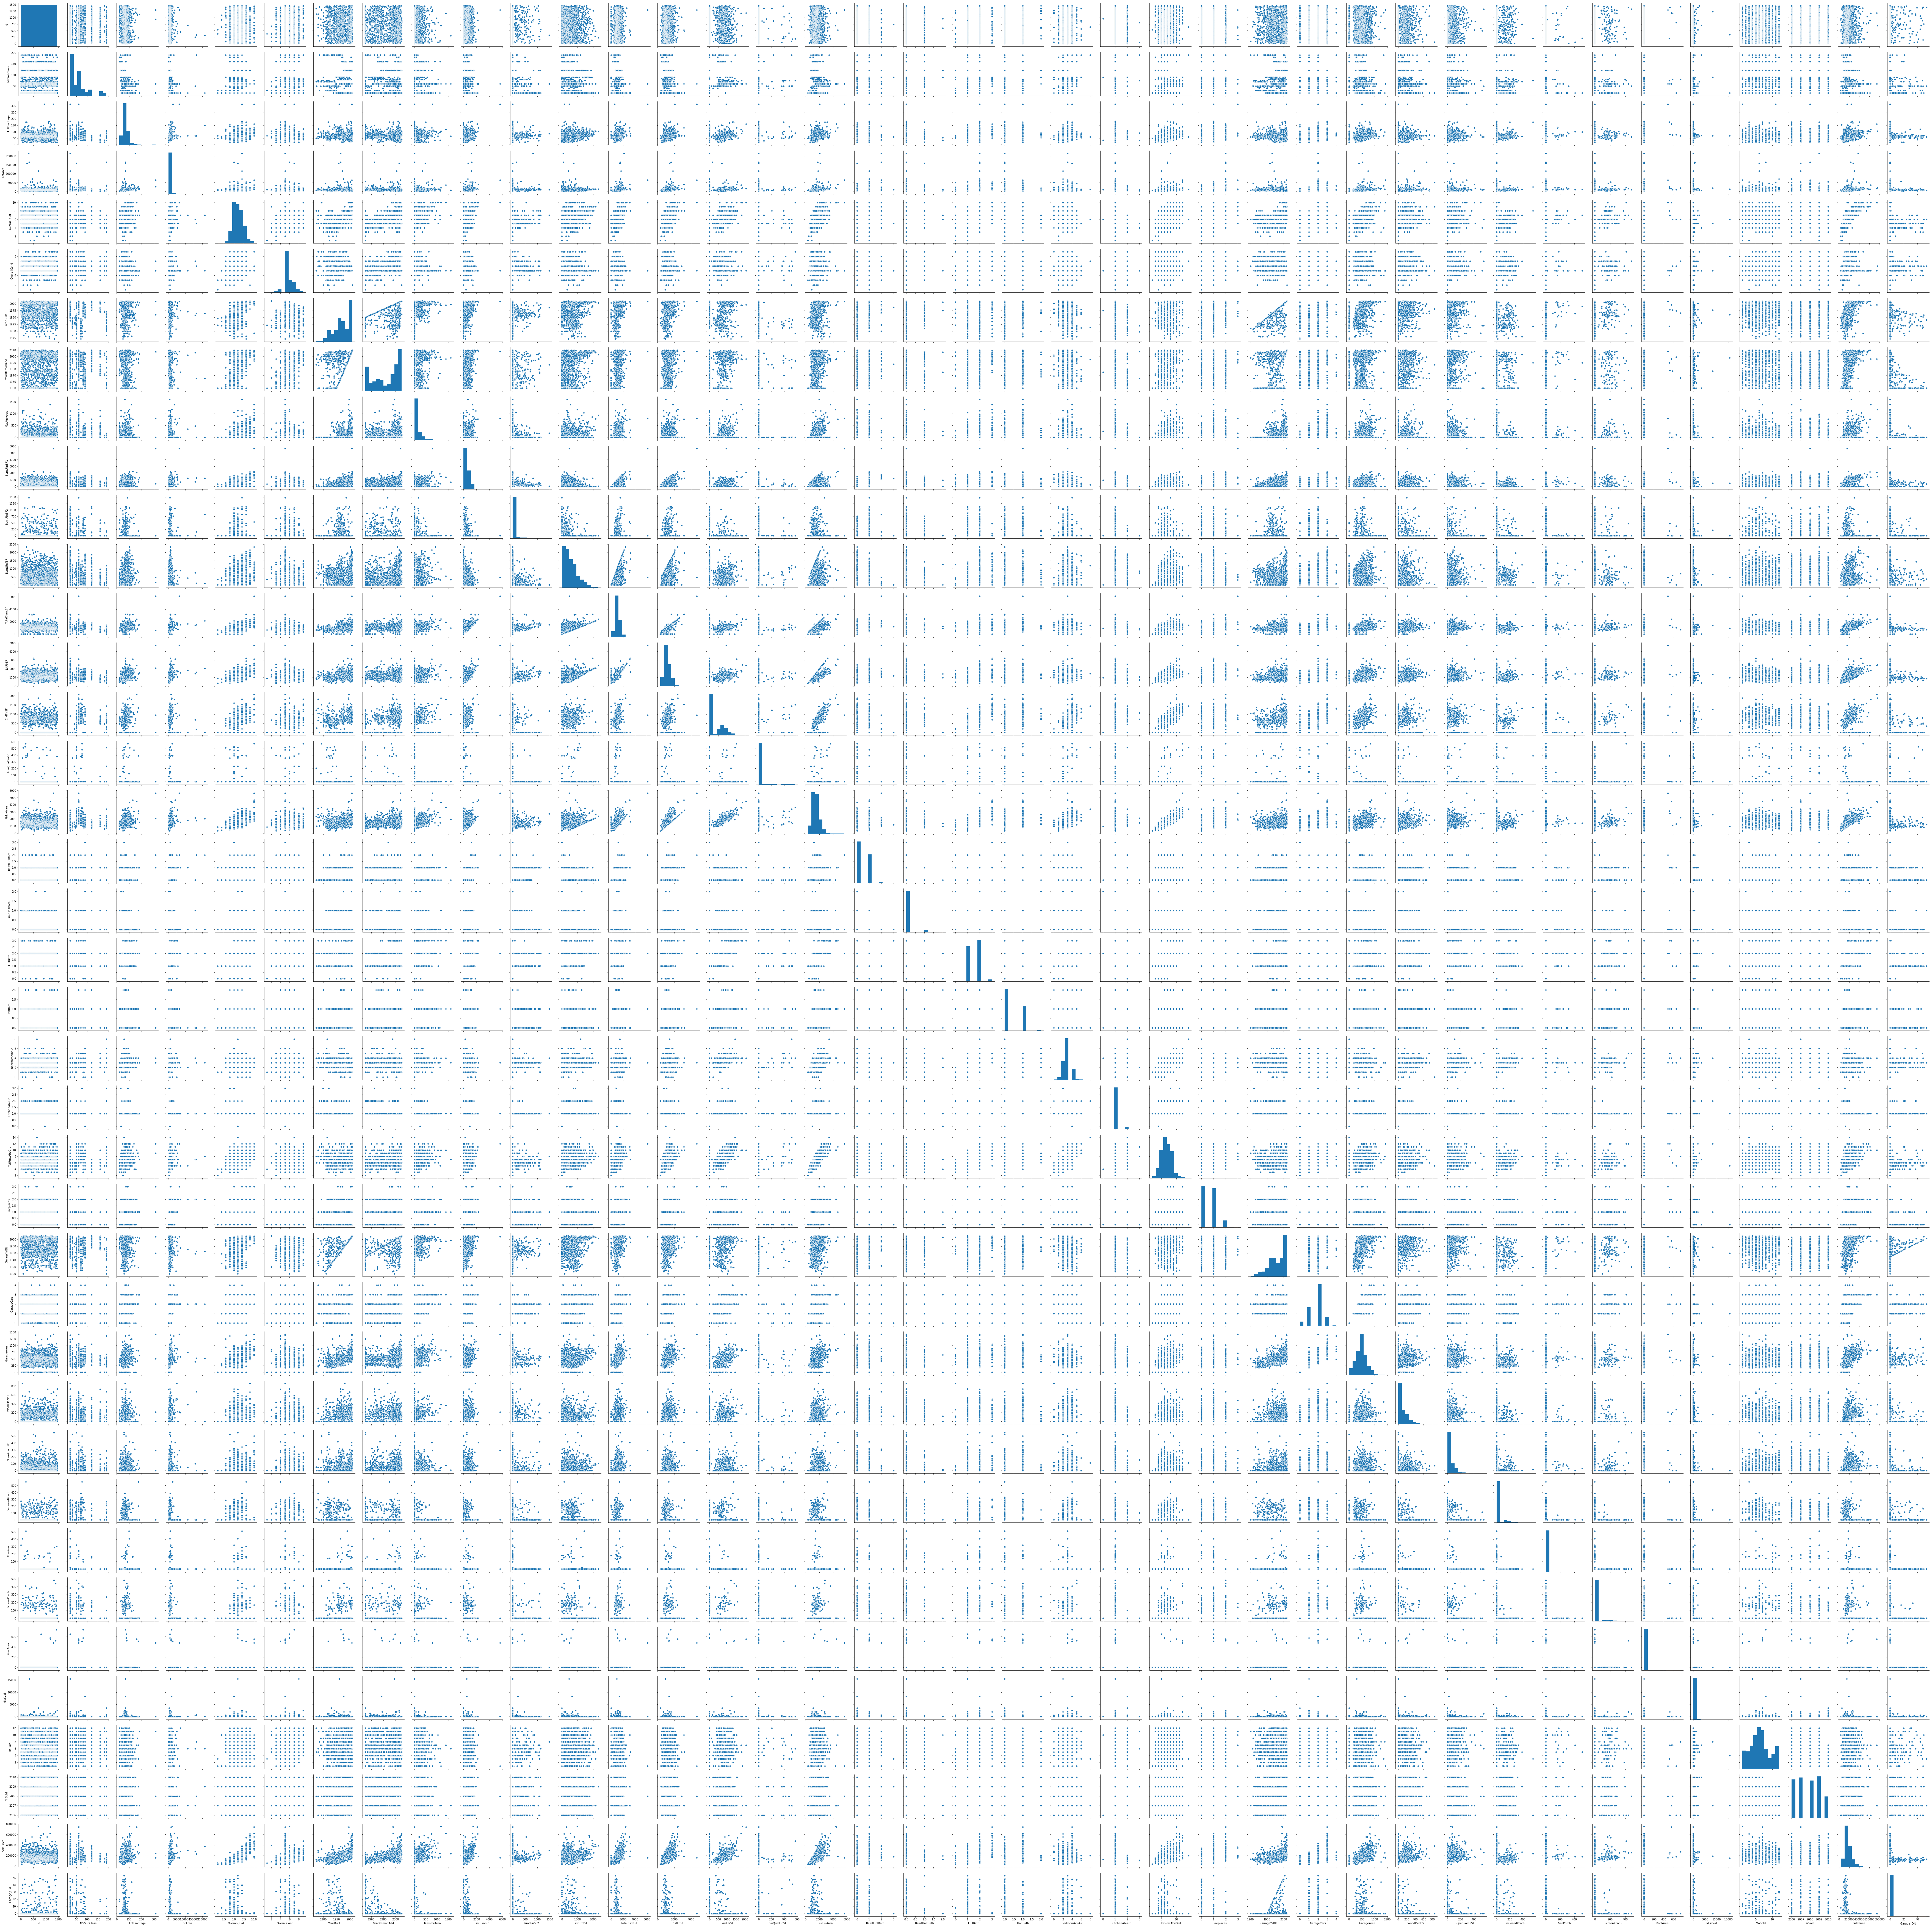

In [1372]:
plt.figure(figsize = (16, 10))
sns.pairplot(master_df)
plt.show()

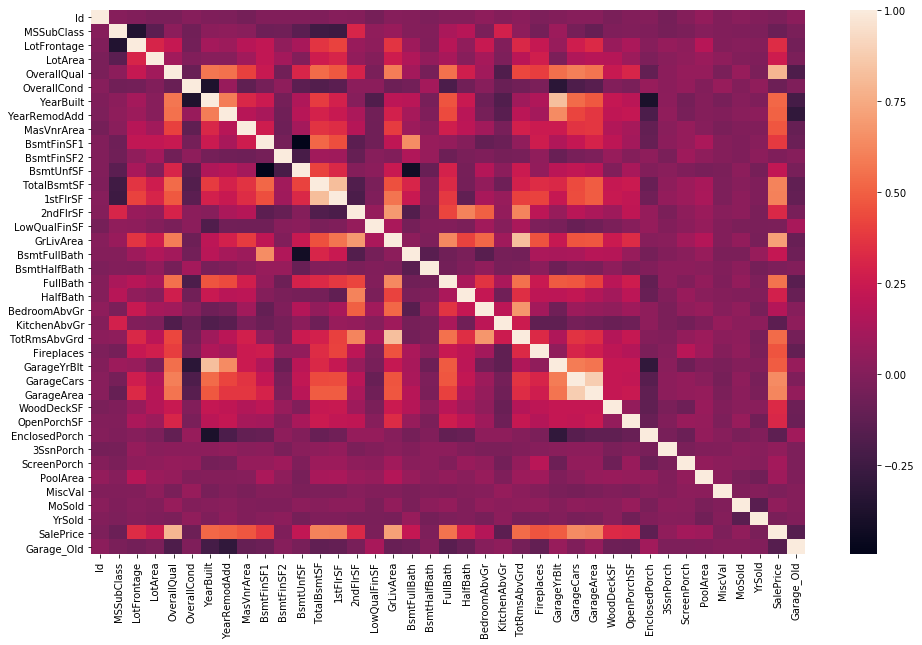

In [1373]:
plt.figure(figsize = (16, 10))
sns.heatmap(master_df.corr())
plt.show()

The above two plots shows that there are some correlations between variables, but we are not removing the columns immediately. We will do it over model preparation.

Checking outliers for the dependent varaible over the dataset

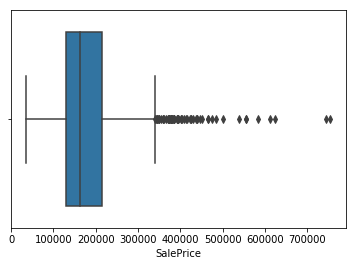

In [1374]:
sns.boxplot(master_df['SalePrice'])
plt.show()

In [1375]:
master_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1376]:
master_df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009921 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.356718 -0.139781     0.032628   
LotFrontage   -0.009921   -0.356718     1.000000  0.304522     0.234812   
LotArea       -0.033226   -0.139781     0.304522  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234812  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.053281 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.116685  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.083348  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.178469  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.214367  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.042463  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.124098 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363472  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.413773  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072388  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.037469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368007  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.090343  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006979  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180534  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.047222  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.236840  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.004905 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320518  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.233221  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.066497 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.269539  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323511  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.075542  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137014  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010287 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.061945  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037655  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180819  0.077672     0.065166   
MiscVal       -0.006242   -0.007683    -0.000255  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010451  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006380 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.334771  0.263843     0.790982   
Garage_Old     0.024724   -0.032234    -0.056035 -0.025402    -0.188836   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.053281   0.116685      0.083348    0.178469    0.214367   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495

In [1377]:
# Deleting 'GarageYrBlt' because it has high correlation with 'YearBuilt' and we already derived the age of the Garage
master_df.drop(columns=['GarageYrBlt'], inplace=True)

In [1378]:
master_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig     ...     3SsnPorch ScreenPorch PoolArea MiscVal  \
0    AllPub    Inside     ...             0           0        0       0   
1    AllPub       FR2     ...             0           0        0       0   
2    AllPub    Inside     ...             0           0        0       0   
3    AllPub    Corner     ...             0           0        0       0   
4    AllPub       FR2     ...             0           0        0       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  Garage_Old  
0      2   2008        WD         Normal     208500         0.0  
1      5   2007        WD         Normal     181500         0.0  
2      9   2008        WD         Normal     223500         0.0  
3      2   2006        WD        Abnorml     140000        28.0  
4     12   2008        WD         Normal     250000         0.0  

[5 rows x 77 columns]

In [1379]:
master_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64


In [1380]:
master_df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1381]:
master_df.select_dtypes(include='object').describe().transpose().sort_values(by='unique')

count unique           top  freq
Street         1460      2          Pave  1454
Utilities      1460      2        AllPub  1459
CentralAir     1460      2             Y  1365
LandSlope      1460      3           Gtl  1382
PavedDrive     1460      3             Y  1340
GarageFinish   1460      4           Unf   605
LotShape       1460      4           Reg   925
LandContour    1460      4           Lvl  1311
ExterQual      1460      4            TA   906
MasVnrType     1460      4          None   872
KitchenQual    1460      4            TA   735
BsmtCond       1460      5            TA  1311
BsmtQual       1460      5            TA   649
HeatingQC      1460      5            Ex   741
ExterCond      1460      5            TA  1282
MSZoning       1460      5            RL  1151
BsmtExposure   1460      5            No   953
BldgType       1460      5          1Fam  1220
LotConfig      1460      5        Inside  1052
FireplaceQu    1460      6  No_Fireplace   690
GarageQual     1460      6            TA  1311
GarageCond     1460      6            TA  1326
Electrical     1460      6         SBrkr  1334
Heating        1460      6          GasA  1428
Foundation     1460      6         PConc   647
RoofStyle      1460      6         Gable  1141
SaleCondition  1460      6        Normal  1198
BsmtFinType1   1460      7           Unf   430
Functional     1460      7           Typ  1360
GarageType     1460      7        Attchd   870
BsmtFinType2   1460      7           Unf  1256
RoofMatl       1460      8       CompShg  1434
HouseStyle     1460      8        1Story   726
Condition2     1460      8          Norm  1445
SaleType       1460      9            WD  1267
Condition1     1460      9          Norm  1260
Exterior1st    1460     15       VinylSd   515
Exterior2nd    1460     16       VinylSd   504
Neighborhood   1460     25         NAmes   225

In [1382]:
master_df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

Convert `CentralAir` from Y and N to 1 and 0 columns

In [1383]:
YN_cols = ['CentralAir']
for x in YN_cols:
    master_df[x] = master_df[x].map({'Y': 1, 'N': 0})
master_df[YN_cols].describe()

CentralAir
count  1460.000000
mean      0.934932
std       0.246731
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000

In [1384]:
master_df.select_dtypes(include='object').describe().transpose().sort_values(by='unique')

count unique           top  freq
Street         1460      2          Pave  1454
Utilities      1460      2        AllPub  1459
PavedDrive     1460      3             Y  1340
LandSlope      1460      3           Gtl  1382
LotShape       1460      4           Reg   925
LandContour    1460      4           Lvl  1311
GarageFinish   1460      4           Unf   605
KitchenQual    1460      4            TA   735
ExterQual      1460      4            TA   906
MasVnrType     1460      4          None   872
MSZoning       1460      5            RL  1151
HeatingQC      1460      5            Ex   741
BsmtExposure   1460      5            No   953
BsmtCond       1460      5            TA  1311
BsmtQual       1460      5            TA   649
ExterCond      1460      5            TA  1282
LotConfig      1460      5        Inside  1052
BldgType       1460      5          1Fam  1220
SaleCondition  1460      6        Normal  1198
GarageCond     1460      6            TA  1326
Foundation     1460      6         PConc   647
RoofStyle      1460      6         Gable  1141
GarageQual     1460      6            TA  1311
Heating        1460      6          GasA  1428
Electrical     1460      6         SBrkr  1334
FireplaceQu    1460      6  No_Fireplace   690
BsmtFinType1   1460      7           Unf   430
BsmtFinType2   1460      7           Unf  1256
GarageType     1460      7        Attchd   870
Functional     1460      7           Typ  1360
Condition2     1460      8          Norm  1445
HouseStyle     1460      8        1Story   726
RoofMatl       1460      8       CompShg  1434
SaleType       1460      9            WD  1267
Condition1     1460      9          Norm  1260
Exterior1st    1460     15       VinylSd   515
Exterior2nd    1460     16       VinylSd   504
Neighborhood   1460     25         NAmes   225

In [1385]:
master_df['YearRemodAdd'].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
       ... 
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [1386]:
master_df['Property_Age_when_sold'] = master_df['YrSold']-master_df['YearRemodAdd']
master_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig           ...           ScreenPorch PoolArea MiscVal  \
0    AllPub    Inside           ...                     0        0       0   
1    AllPub       FR2           ...                     0        0       0   
2    AllPub    Inside           ...                     0        0       0   
3    AllPub    Corner           ...                     0        0       0   
4    AllPub       FR2           ...                     0        0       0   

  MoSold YrSold SaleType  SaleCondition  SalePrice  Garage_Old  \
0      2   2008       WD         Normal     208500         0.0   
1      5   2007       WD         Normal     181500         0.0   
2      9   2008       WD         Normal     223500         0.0   
3      2   2006       WD        Abnorml     140000        28.0   
4     12   2008       WD         Normal     250000         0.0   

   Property_Age_when_sold  
0                       5  
1                      31  
2                       6  
3                      36  
4                       8  

[5 rows x 78 columns]

In [1387]:
master_df['Property_Age'] = 2019-master_df['YearRemodAdd']
master_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig      ...      PoolArea MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside      ...             0       0      2   2008       WD   
1    AllPub       FR2      ...             0       0      5   2007       WD   
2    AllPub    Inside      ...             0       0      9   2008       WD   
3    AllPub    Corner      ...             0       0      2   2006       WD   
4    AllPub       FR2      ...             0       0     12   2008       WD   

  SaleCondition  SalePrice  Garage_Old  Property_Age_when_sold  Property_Age  
0        Normal     208500         0.0                       5            16  
1        Normal     181500         0.0                      31            43  
2        Normal     223500         0.0                       6            17  
3       Abnorml     140000        28.0                      36            49  
4        Normal     250000         0.0                       8            19  

[5 rows x 79 columns]

In [1388]:
def customMethod2(x):
    if x!=0:
        return 1
    else:
        return 0

master_df['Is_renovated']= (master_df['YearRemodAdd']-master_df['YearBuilt']).apply(customMethod2)
master_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig      ...      MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside      ...            0      2   2008       WD   
1    AllPub       FR2      ...            0      5   2007       WD   
2    AllPub    Inside      ...            0      9   2008       WD   
3    AllPub    Corner      ...            0      2   2006       WD   
4    AllPub       FR2      ...            0     12   2008       WD   

  SaleCondition SalePrice  Garage_Old  Property_Age_when_sold  Property_Age  \
0        Normal    208500         0.0                       5            16   
1        Normal    181500         0.0                      31            43   
2        Normal    223500         0.0                       6            17   
3       Abnorml    140000        28.0                      36            49   
4        Normal    250000         0.0                       8            19   

   Is_renovated  
0             0  
1             0  
2             1  
3             1  
4             0  

[5 rows x 80 columns]

In [1389]:
master_df.drop(columns=['YearRemodAdd'], inplace=True)
master_df.drop(columns=['YearBuilt'], inplace=True)

In [1391]:
master_df.select_dtypes(include='object').describe().transpose().sort_values(by='unique').index

Index(['Street', 'Utilities', 'PavedDrive', 'LandSlope', 'LotShape',
       'LandContour', 'GarageFinish', 'KitchenQual', 'ExterQual', 'MasVnrType',
       'MSZoning', 'HeatingQC', 'BsmtExposure', 'BsmtCond', 'BsmtQual',
       'ExterCond', 'LotConfig', 'BldgType', 'SaleCondition', 'GarageCond',
       'Foundation', 'RoofStyle', 'GarageQual', 'Heating', 'Electrical',
       'FireplaceQu', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'Functional', 'Condition2', 'HouseStyle', 'RoofMatl', 'SaleType',
       'Condition1', 'Exterior1st', 'Exterior2nd', 'Neighborhood'],
      dtype='object')

In [1392]:
master_df.select_dtypes(include='object').describe().columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

We can drop the `Id` column as it is not required for our further analysis.

In [1393]:
master_df.drop(columns=['Id'], inplace=True)
master_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope     ...      MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside       Gtl     ...            0      2   2008       WD   
1    AllPub       FR2       Gtl     ...            0      5   2007       WD   
2    AllPub    Inside       Gtl     ...            0      9   2008       WD   
3    AllPub    Corner       Gtl     ...            0      2   2006       WD   
4    AllPub       FR2       Gtl     ...            0     12   2008       WD   

  SaleCondition  SalePrice  Garage_Old Property_Age_when_sold Property_Age  \
0        Normal     208500         0.0                      5           16   
1        Normal     181500         0.0                     31           43   
2        Normal     223500         0.0                      6           17   
3       Abnorml     140000        28.0                     36           49   
4        Normal     250000         0.0                      8           19   

  Is_renovated  
0            0  
1            0  
2            1  
3            1  
4            0  

[5 rows x 77 columns]

In [1394]:
cols_to_scale = master_df.select_dtypes(exclude='object').describe().columns.tolist()
cols_to_scale.remove('SalePrice')
cols_to_scale

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Garage_Old',
 'Property_Age_when_sold',
 'Property_Age',
 'Is_renovated']

### Creating dummies and dropping the actual columns

In [1395]:
cols = master_df.select_dtypes(include='object').describe().columns.tolist()
dummy_data = pd.get_dummies(master_df[cols], prefix=cols, drop_first=True)
dummy_data.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=210)

In [1396]:
dummy_data.shape

(1460, 210)

In [1397]:
master_df.shape

(1460, 77)

In [1398]:
combined_df = master_df.copy()
combined_df.drop(columns=cols, axis=1, inplace=True)
combined_df.shape

(1460, 39)

In [1399]:
combined_df.loc[(combined_df.index.isin(dummy_data.index))].shape

(1460, 39)

In [1400]:
combined_df = pd.merge(combined_df,dummy_data,left_index=True,right_index=True)
combined_df.shape

(1460, 249)

In [1401]:
combined_df.isna().values.any()

False

In [1402]:
combined_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
0         706           0        150          856          ...             
1         978           0        284         1262          ...             
2         486           0        434          920          ...             
3         216           0        540          756          ...             
4         655           0        490         1145          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 249 columns]

In [1403]:
combined_df.shape

(1460, 249)

### Dividing the data into train and test split

In [1404]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(combined_df, train_size=0.68, test_size=0.32, random_state=100)

In [1405]:
df_train.shape

(992, 249)

In [1406]:
df_test.shape

(468, 249)

In [1407]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

df_train_scaled = df_train.copy()
df_train_scaled[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

In [1408]:
y_train = df_train_scaled.pop('SalePrice')
X_train = df_train_scaled

In [1409]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
614     0.941176     0.000000  0.000065     0.333333        0.625      0.0000   
405     0.000000     0.164384  0.039828     0.333333        0.375      0.0000   
45      0.588235     0.136986  0.028915     0.888889        0.500      0.2575   
1443    0.058824     0.164384  0.034509     0.555556        0.625      0.0000   
1241    0.000000     0.212329  0.039164     0.666667        0.625      0.0000   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
614     0.026577    0.325645   0.000000     0.103110          ...             
405     0.197732    0.000000   0.070634     0.209656          ...             
45      0.080794    0.000000   0.554795     0.286743          ...             
1443    0.000000    0.000000   0.407534     0.155810          ...             
1241    0.000000    0.000000   0.723031     0.276432          ...             

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
614                0               0             0             0            1   
405                0               0             0             0            1   
45                 0               0             0             0            1   
1443               0               0             0             0            1   
1241               0               0             1             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
614                       0                     0                     0   
405                       0                     0                     0   
45                        0                     0                     0   
1443                      0                     0                     0   
1241                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
614                      1                      0  
405                      1                      0  
45                       1                      0  
1443                     1                      0  
1241                     0                      1  

[5 rows x 248 columns]

In [1410]:
y_train.head()

614      75500
405     150000
45      319900
1443    121000
1241    248328
Name: SalePrice, dtype: int64

In [1411]:
df_test_scaled = df_test.copy()
df_test_scaled[cols_to_scale] = scaler.transform(df_test_scaled[cols_to_scale])

In [1412]:
y_test = df_test_scaled.pop('SalePrice')
X_test = df_test_scaled

In [1413]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1436    0.000000     0.133562  0.035192     0.333333        0.625     0.00000   
57      0.235294     0.232877  0.047566     0.666667        0.500     0.00000   
780     0.000000     0.143836  0.029930     0.666667        0.500     0.02375   
382     0.235294     0.198630  0.036338     0.666667        0.500     0.00000   
1170    0.352941     0.188356  0.039309     0.555556        0.625     0.00000   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
1436    0.109142         0.0   0.106164     0.141408          ...             
57      0.000000         0.0   0.368151     0.140753          ...             
780     0.000000         0.0   0.529538     0.202455          ...             
382     0.000000         0.0   0.401969     0.153682          ...             
1170    0.092488         0.0   0.245719     0.179378          ...             

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436               0               0             0             0            1   
57                 0               0             0             0            1   
780                0               0             0             0            1   
382                0               0             0             0            1   
1170               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436                      0                     0                     0   
57                        0                     0                     0   
780                       0                     0                     0   
382                       0                     0                     0   
1170                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1436                     1                      0  
57                       1                      0  
780                      1                      0  
382                      1                      0  
1170                     1                      0  

[5 rows x 248 columns]

In [1414]:
y_test.head()

1436    120500
57      196500
780     176000
382     213500
1170    171000
Name: SalePrice, dtype: int64

## Performing RFE and Linear Regression

In [1415]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1416]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, 20)
rfe = rfe.fit(X_train, y_train)

In [1417]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW',
       'Functional_Sev'],
      dtype='object')

In [1418]:
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [1419]:
lm2 = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     294.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:55:05   Log-Likelihood:                -11630.
No. Observations:                 992   AIC:                         2.330e+04
Df Residuals:                     971   BIC:                         2.340e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.295e+05   3.58e+04    -23.188      0.000      -9e+05   -7.59e+05
LotFrontage       8.993e+04   1.54e+04      5.838      0.000    5.97e+04     1.2e+05
LotArea           6.831e+04   2.19e+04      3.118      0.002    2.53e+04    1.11e+05
OverallQual       1.921e+05   9245.502     20.777      0.000    1.74e+05     2.1e+05
BsmtFinSF1        1.458e+05   1.45e+04     10.069      0.000    1.17e+05    1.74e+05
TotalBsmtSF       1.573e+05   2.59e+04      6.078      0.000    1.07e+05    2.08e+05
1stFlrSF           5.08e+05   9.85e+04      5.156      0.000    3.15e+05    7.01e+05
2ndFlrSF          2.303e+05   4.67e+04      4.933      0.000    1.39e+05    3.22e+05
GrLivArea        -1.992e+05   1.16e+05     -1.711      0.087   -4.28e+05    2.93e+04
BedroomAbvGr      -8.08e+04   1.23e+04     -6.551      0.000   -1.05e+05   -5.66e+04
KitchenAbvGr     -5.614e+04   9438.589     -5.948      0.000   -7.47e+04   -3.76e+04
Condition2_PosN  -4.528e+05   3.13e+04    -14.464      0.000   -5.14e+05   -3.91e+05
RoofMatl_CompShg  7.856e+05   3.51e+04     22.374      0.000    7.17e+05    8.55e+05
RoofMatl_Membran  8.124e+05   4.65e+04     17.484      0.000    7.21e+05    9.04e+05
RoofMatl_Metal    7.919e+05   4.62e+04     17.155      0.000    7.01e+05    8.83e+05
RoofMatl_Roll     7.748e+05   4.62e+04     16.777      0.000    6.84e+05    8.65e+05
RoofMatl_Tar&Grv  7.873e+05   3.74e+04     21.060      0.000    7.14e+05    8.61e+05
RoofMatl_WdShake  7.432e+05   3.81e+04     19.531      0.000    6.69e+05    8.18e+05
RoofMatl_WdShngl  8.461e+05   3.76e+04     22.531      0.000    7.72e+05     9.2e+05
Heating_OthW     -1.062e+05   3.07e+04     -3.462      0.001   -1.66e+05    -4.6e+04
Functional_Sev   -1.128e+05   3.32e+04     -3.401      0.001   -1.78e+05   -4.77e+04
==============================================================================
Omnibus:                      215.364   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.289
Skew:                           0.795   Prob(JB):                         0.00
Kurtosis:                       8.887   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We need to drop `GrLivArea` as it is insignificant as per the p-value.

In [1420]:
X_train_new = X_train_rfe.drop(columns=['GrLivArea'])

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     308.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:55:05   Log-Likelihood:                -11631.
No. Observations:                 992   AIC:                         2.330e+04
Df Residuals:                     972   BIC:                         2.340e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.272e+05   3.58e+04    -23.118      0.000   -8.97e+05   -7.57e+05
LotFrontage       8.953e+04   1.54e+04      5.807      0.000    5.93e+04     1.2e+05
LotArea           6.826e+04   2.19e+04      3.113      0.002    2.52e+04    1.11e+05
OverallQual       1.926e+05   9250.839     20.814      0.000    1.74e+05    2.11e+05
BsmtFinSF1        1.471e+05   1.45e+04     10.167      0.000    1.19e+05    1.76e+05
TotalBsmtSF       1.561e+05   2.59e+04      6.028      0.000    1.05e+05    2.07e+05
1stFlrSF          3.432e+05   2.09e+04     16.426      0.000    3.02e+05    3.84e+05
2ndFlrSF          1.513e+05   6852.327     22.075      0.000    1.38e+05    1.65e+05
BedroomAbvGr     -8.218e+04   1.23e+04     -6.670      0.000   -1.06e+05    -5.8e+04
KitchenAbvGr     -5.616e+04   9447.936     -5.945      0.000   -7.47e+04   -3.76e+04
Condition2_PosN   -4.53e+05   3.13e+04    -14.456      0.000   -5.15e+05   -3.92e+05
RoofMatl_CompShg   7.86e+05   3.51e+04     22.364      0.000    7.17e+05    8.55e+05
RoofMatl_Membran  8.129e+05   4.65e+04     17.478      0.000    7.22e+05    9.04e+05
RoofMatl_Metal    7.921e+05   4.62e+04     17.142      0.000    7.01e+05    8.83e+05
RoofMatl_Roll     7.757e+05   4.62e+04     16.782      0.000    6.85e+05    8.66e+05
RoofMatl_Tar&Grv  7.878e+05   3.74e+04     21.054      0.000    7.14e+05    8.61e+05
RoofMatl_WdShake  7.436e+05   3.81e+04     19.521      0.000    6.69e+05    8.18e+05
RoofMatl_WdShngl  8.464e+05   3.76e+04     22.517      0.000    7.73e+05     9.2e+05
Heating_OthW     -1.138e+05   3.04e+04     -3.746      0.000   -1.73e+05   -5.42e+04
Functional_Sev   -1.127e+05   3.32e+04     -3.395      0.001   -1.78e+05   -4.75e+04
==============================================================================
Omnibus:                      212.510   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1583.003
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       8.995   Cond. No.                         169.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-values for the features looks good, now let's check the VIF for all of them.

In [1421]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10  RoofMatl_CompShg  32.45
2        OverallQual  31.89
4        TotalBsmtSF  25.43
7       BedroomAbvGr  22.71
5           1stFlrSF  20.27
0        LotFrontage   8.13
6           2ndFlrSF   3.60
3         BsmtFinSF1   2.89
1            LotArea   2.18
14  RoofMatl_Tar&Grv   1.34
8       KitchenAbvGr   1.29
18    Functional_Sev   1.21
16  RoofMatl_WdShngl   1.17
15  RoofMatl_WdShake   1.14
13     RoofMatl_Roll   1.06
9    Condition2_PosN   1.06
11  RoofMatl_Membran   1.05
12    RoofMatl_Metal   1.03
17      Heating_OthW   1.01

We can see there are some VIF with high values indicating correlations between them, we need to drop one (`RoofMatl_CompShg`) and run the same iterations again.

In [1422]:
X_train_new.drop(columns=['RoofMatl_CompShg'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     197.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          3.03e-309
Time:                        22:55:05   Log-Likelihood:                -11837.
No. Observations:                 992   AIC:                         2.371e+04
Df Residuals:                     973   BIC:                         2.381e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.693e+04   6907.668     -5.346      0.000   -5.05e+04   -2.34e+04
LotFrontage         1.5e+04   1.85e+04      0.810      0.418   -2.13e+04    5.13e+04
LotArea           7.501e+04    2.7e+04      2.781      0.006    2.21e+04    1.28e+05
OverallQual       2.341e+05   1.11e+04     20.997      0.000    2.12e+05    2.56e+05
BsmtFinSF1        8.757e+04   1.75e+04      5.006      0.000    5.32e+04    1.22e+05
TotalBsmtSF       5.245e+04   3.13e+04      1.673      0.095   -9064.100    1.14e+05
1stFlrSF          3.284e+05   2.57e+04     12.784      0.000    2.78e+05    3.79e+05
2ndFlrSF          1.187e+05   8235.944     14.411      0.000    1.03e+05    1.35e+05
BedroomAbvGr     -4.241e+04    1.5e+04     -2.828      0.005   -7.18e+04    -1.3e+04
KitchenAbvGr     -5.573e+04   1.16e+04     -4.796      0.000   -7.85e+04   -3.29e+04
Condition2_PosN  -3.763e+05   3.83e+04     -9.820      0.000   -4.51e+05   -3.01e+05
RoofMatl_Membran  2.639e+04   3.74e+04      0.705      0.481   -4.71e+04    9.99e+04
RoofMatl_Metal    1.329e+04   3.74e+04      0.356      0.722      -6e+04    8.66e+04
RoofMatl_Roll     1049.1412   3.76e+04      0.028      0.978   -7.28e+04    7.49e+04
RoofMatl_Tar&Grv  9053.2541   1.68e+04      0.538      0.591    -2.4e+04    4.21e+04
RoofMatl_WdShake -3.467e+04   1.91e+04     -1.820      0.069   -7.21e+04    2717.907
RoofMatl_WdShngl  8.053e+04   1.91e+04      4.224      0.000    4.31e+04    1.18e+05
Heating_OthW     -1.275e+05   3.74e+04     -3.413      0.001   -2.01e+05   -5.42e+04
Functional_Sev    -1.13e+05   4.08e+04     -2.768      0.006   -1.93e+05   -3.29e+04
==============================================================================
Omnibus:                      835.487   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182377.347
Skew:                          -2.983   Prob(JB):                         0.00
Kurtosis:                      69.157   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1423]:
X_train_new.drop(columns=['RoofMatl_Roll'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          2.07e-310
Time:                        22:55:05   Log-Likelihood:                -11837.
No. Observations:                 992   AIC:                         2.371e+04
Df Residuals:                     974   BIC:                         2.380e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.693e+04   6903.915     -5.349      0.000   -5.05e+04   -2.34e+04
LotFrontage       1.502e+04   1.85e+04      0.812      0.417   -2.13e+04    5.13e+04
LotArea           7.501e+04    2.7e+04      2.783      0.005    2.21e+04    1.28e+05
OverallQual       2.341e+05   1.11e+04     21.008      0.000    2.12e+05    2.56e+05
BsmtFinSF1        8.757e+04   1.75e+04      5.008      0.000    5.33e+04    1.22e+05
TotalBsmtSF       5.249e+04   3.13e+04      1.677      0.094   -8938.016    1.14e+05
1stFlrSF          3.283e+05   2.56e+04     12.806      0.000    2.78e+05    3.79e+05
2ndFlrSF          1.187e+05   8229.723     14.423      0.000    1.03e+05    1.35e+05
BedroomAbvGr     -4.242e+04    1.5e+04     -2.830      0.005   -7.18e+04    -1.3e+04
KitchenAbvGr     -5.569e+04   1.15e+04     -4.837      0.000   -7.83e+04   -3.31e+04
Condition2_PosN  -3.763e+05   3.83e+04     -9.826      0.000   -4.51e+05   -3.01e+05
RoofMatl_Membran  2.639e+04   3.74e+04      0.705      0.481    -4.7e+04    9.98e+04
RoofMatl_Metal    1.329e+04   3.73e+04      0.356      0.722      -6e+04    8.66e+04
RoofMatl_Tar&Grv  9054.3600   1.68e+04      0.538      0.591    -2.4e+04    4.21e+04
RoofMatl_WdShake -3.466e+04    1.9e+04     -1.820      0.069    -7.2e+04    2701.784
RoofMatl_WdShngl  8.053e+04   1.91e+04      4.226      0.000    4.31e+04    1.18e+05
Heating_OthW     -1.275e+05   3.73e+04     -3.414      0.001   -2.01e+05   -5.42e+04
Functional_Sev    -1.13e+05   4.08e+04     -2.770      0.006   -1.93e+05   -3.29e+04
==============================================================================
Omnibus:                      835.551   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182410.116
Skew:                          -2.984   Prob(JB):                         0.00
Kurtosis:                      69.163   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1424]:
X_train_new.drop(columns=['RoofMatl_Metal'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     222.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.45e-311
Time:                        22:55:05   Log-Likelihood:                -11837.
No. Observations:                 992   AIC:                         2.371e+04
Df Residuals:                     975   BIC:                         2.379e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.682e+04   6894.426     -5.341      0.000   -5.04e+04   -2.33e+04
LotFrontage       1.509e+04   1.85e+04      0.817      0.414   -2.12e+04    5.14e+04
LotArea            7.54e+04   2.69e+04      2.801      0.005    2.26e+04    1.28e+05
OverallQual       2.341e+05   1.11e+04     21.024      0.000    2.12e+05    2.56e+05
BsmtFinSF1        8.776e+04   1.75e+04      5.024      0.000    5.35e+04    1.22e+05
TotalBsmtSF       5.231e+04   3.13e+04      1.672      0.095   -9080.478    1.14e+05
1stFlrSF          3.282e+05   2.56e+04     12.808      0.000    2.78e+05    3.79e+05
2ndFlrSF          1.187e+05   8226.023     14.429      0.000    1.03e+05    1.35e+05
BedroomAbvGr     -4.273e+04    1.5e+04     -2.858      0.004   -7.21e+04   -1.34e+04
KitchenAbvGr     -5.562e+04   1.15e+04     -4.834      0.000   -7.82e+04    -3.3e+04
Condition2_PosN  -3.763e+05   3.83e+04     -9.831      0.000   -4.51e+05   -3.01e+05
RoofMatl_Membran  2.631e+04   3.74e+04      0.703      0.482   -4.71e+04    9.97e+04
RoofMatl_Tar&Grv  9003.7855   1.68e+04      0.535      0.593    -2.4e+04     4.2e+04
RoofMatl_WdShake -3.469e+04    1.9e+04     -1.823      0.069    -7.2e+04    2652.262
RoofMatl_WdShngl  8.044e+04    1.9e+04      4.224      0.000    4.31e+04    1.18e+05
Heating_OthW     -1.274e+05   3.73e+04     -3.415      0.001   -2.01e+05   -5.42e+04
Functional_Sev    -1.13e+05   4.08e+04     -2.770      0.006   -1.93e+05   -3.29e+04
==============================================================================
Omnibus:                      835.941   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182603.910
Skew:                          -2.986   Prob(JB):                         0.00
Kurtosis:                      69.198   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1425]:
X_train_new.drop(columns=['RoofMatl_Tar&Grv'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     237.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.07e-312
Time:                        22:55:05   Log-Likelihood:                -11837.
No. Observations:                 992   AIC:                         2.371e+04
Df Residuals:                     976   BIC:                         2.379e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.65e+04   6865.371     -5.317      0.000      -5e+04    -2.3e+04
LotFrontage       1.528e+04   1.85e+04      0.828      0.408    -2.1e+04    5.15e+04
LotArea           7.641e+04   2.68e+04      2.846      0.005    2.37e+04    1.29e+05
OverallQual       2.337e+05   1.11e+04     21.044      0.000    2.12e+05    2.55e+05
BsmtFinSF1        8.771e+04   1.75e+04      5.023      0.000    5.34e+04    1.22e+05
TotalBsmtSF       5.142e+04   3.12e+04      1.646      0.100   -9867.405    1.13e+05
1stFlrSF          3.293e+05   2.55e+04     12.893      0.000    2.79e+05    3.79e+05
2ndFlrSF          1.189e+05   8217.410     14.464      0.000    1.03e+05    1.35e+05
BedroomAbvGr     -4.323e+04   1.49e+04     -2.897      0.004   -7.25e+04   -1.39e+04
KitchenAbvGr     -5.585e+04   1.15e+04     -4.859      0.000   -7.84e+04   -3.33e+04
Condition2_PosN  -3.766e+05   3.83e+04     -9.844      0.000   -4.52e+05   -3.02e+05
RoofMatl_Membran  2.613e+04   3.74e+04      0.699      0.485   -4.72e+04    9.95e+04
RoofMatl_WdShake -3.492e+04    1.9e+04     -1.836      0.067   -7.22e+04    2406.917
RoofMatl_WdShngl  8.025e+04    1.9e+04      4.216      0.000    4.29e+04    1.18e+05
Heating_OthW     -1.274e+05   3.73e+04     -3.415      0.001   -2.01e+05   -5.42e+04
Functional_Sev   -1.042e+05   3.73e+04     -2.792      0.005   -1.77e+05   -3.09e+04
==============================================================================
Omnibus:                      836.910   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183357.632
Skew:                          -2.991   Prob(JB):                         0.00
Kurtosis:                      69.335   Cond. No.                         41.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1426]:
X_train_new.drop(columns=['RoofMatl_Membran'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm8 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     254.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          8.40e-314
Time:                        22:55:05   Log-Likelihood:                -11838.
No. Observations:                 992   AIC:                         2.371e+04
Df Residuals:                     977   BIC:                         2.378e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.649e+04   6863.563     -5.317      0.000      -5e+04    -2.3e+04
LotFrontage       1.515e+04   1.85e+04      0.821      0.412   -2.11e+04    5.14e+04
LotArea           7.825e+04   2.67e+04      2.930      0.003    2.58e+04    1.31e+05
OverallQual       2.339e+05   1.11e+04     21.076      0.000    2.12e+05    2.56e+05
BsmtFinSF1        8.718e+04   1.74e+04      4.998      0.000    5.29e+04    1.21e+05
TotalBsmtSF       5.174e+04   3.12e+04      1.657      0.098   -9517.945    1.13e+05
1stFlrSF           3.29e+05   2.55e+04     12.887      0.000    2.79e+05    3.79e+05
2ndFlrSF          1.187e+05   8213.492     14.456      0.000    1.03e+05    1.35e+05
BedroomAbvGr     -4.351e+04   1.49e+04     -2.918      0.004   -7.28e+04   -1.42e+04
KitchenAbvGr     -5.575e+04   1.15e+04     -4.852      0.000   -7.83e+04   -3.32e+04
Condition2_PosN  -3.767e+05   3.83e+04     -9.849      0.000   -4.52e+05   -3.02e+05
RoofMatl_WdShake -3.495e+04    1.9e+04     -1.838      0.066   -7.23e+04    2359.594
RoofMatl_WdShngl      8e+04    1.9e+04      4.205      0.000    4.27e+04    1.17e+05
Heating_OthW     -1.273e+05   3.73e+04     -3.414      0.001   -2.01e+05   -5.41e+04
Functional_Sev   -1.042e+05   3.73e+04     -2.794      0.005   -1.77e+05    -3.1e+04
==============================================================================
Omnibus:                      836.458   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           182936.213
Skew:                          -2.989   Prob(JB):                         0.00
Kurtosis:                      69.258   Cond. No.                         41.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1427]:
X_train_new.drop(columns=['LotFrontage'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm9 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     273.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          6.96e-315
Time:                        22:55:05   Log-Likelihood:                -11838.
No. Observations:                 992   AIC:                         2.370e+04
Df Residuals:                     978   BIC:                         2.377e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.561e+04   6777.684     -5.254      0.000   -4.89e+04   -2.23e+04
LotArea           8.273e+04   2.61e+04      3.165      0.002    3.14e+04    1.34e+05
OverallQual       2.333e+05   1.11e+04     21.074      0.000    2.12e+05    2.55e+05
BsmtFinSF1        8.815e+04   1.74e+04      5.067      0.000     5.4e+04    1.22e+05
TotalBsmtSF       5.421e+04   3.11e+04      1.745      0.081   -6754.710    1.15e+05
1stFlrSF          3.324e+05   2.52e+04     13.202      0.000    2.83e+05    3.82e+05
2ndFlrSF          1.196e+05   8148.574     14.674      0.000    1.04e+05    1.36e+05
BedroomAbvGr     -4.198e+04   1.48e+04     -2.838      0.005    -7.1e+04   -1.29e+04
KitchenAbvGr     -5.624e+04   1.15e+04     -4.902      0.000   -7.88e+04   -3.37e+04
Condition2_PosN  -3.772e+05   3.82e+04     -9.863      0.000   -4.52e+05   -3.02e+05
RoofMatl_WdShake -3.494e+04    1.9e+04     -1.838      0.066   -7.22e+04    2369.972
RoofMatl_WdShngl  7.921e+04    1.9e+04      4.169      0.000    4.19e+04    1.16e+05
Heating_OthW     -1.283e+05   3.73e+04     -3.443      0.001   -2.01e+05   -5.52e+04
Functional_Sev   -1.049e+05   3.73e+04     -2.812      0.005   -1.78e+05   -3.17e+04
==============================================================================
Omnibus:                      813.263   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169740.487
Skew:                          -2.857   Prob(JB):                         0.00
Kurtosis:                      66.828   Cond. No.                         41.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1428]:
X_train_new.drop(columns=['TotalBsmtSF'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm10 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     295.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.80e-315
Time:                        22:55:05   Log-Likelihood:                -11840.
No. Observations:                 992   AIC:                         2.371e+04
Df Residuals:                     979   BIC:                         2.377e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.518e+04   6780.230     -5.188      0.000   -4.85e+04   -2.19e+04
LotArea           8.508e+04   2.61e+04      3.256      0.001    3.38e+04    1.36e+05
OverallQual       2.387e+05   1.06e+04     22.454      0.000    2.18e+05     2.6e+05
BsmtFinSF1        9.758e+04   1.66e+04      5.895      0.000    6.51e+04     1.3e+05
1stFlrSF          3.596e+05   1.98e+04     18.131      0.000    3.21e+05    3.98e+05
2ndFlrSF          1.178e+05   8094.777     14.555      0.000    1.02e+05    1.34e+05
BedroomAbvGr     -4.074e+04   1.48e+04     -2.754      0.006   -6.98e+04   -1.17e+04
KitchenAbvGr     -5.901e+04   1.14e+04     -5.188      0.000   -8.13e+04   -3.67e+04
Condition2_PosN  -3.759e+05   3.83e+04     -9.822      0.000   -4.51e+05   -3.01e+05
RoofMatl_WdShake -3.958e+04   1.88e+04     -2.100      0.036   -7.66e+04   -2598.883
RoofMatl_WdShngl  7.905e+04    1.9e+04      4.157      0.000    4.17e+04    1.16e+05
Heating_OthW     -1.305e+05   3.73e+04     -3.501      0.000   -2.04e+05   -5.74e+04
Functional_Sev   -1.063e+05   3.73e+04     -2.849      0.004    -1.8e+05   -3.31e+04
==============================================================================
Omnibus:                      768.718   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144865.972
Skew:                          -2.614   Prob(JB):                         0.00
Kurtosis:                      61.970   Cond. No.                         40.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1429]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1        OverallQual  14.79
3           1stFlrSF  11.10
5       BedroomAbvGr  10.54
4           2ndFlrSF   2.68
2         BsmtFinSF1   2.57
0            LotArea   2.03
6       KitchenAbvGr   1.23
7    Condition2_PosN   1.06
9   RoofMatl_WdShngl   1.05
8   RoofMatl_WdShake   1.03
10      Heating_OthW   1.01
11    Functional_Sev   1.01

In [1430]:
X_train_new.drop(columns=['OverallQual'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm11 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          1.25e-228
Time:                        22:55:05   Log-Likelihood:                -12046.
No. Observations:                 992   AIC:                         2.412e+04
Df Residuals:                     980   BIC:                         2.417e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.971e+04   6045.927     11.530      0.000    5.78e+04    8.16e+04
LotArea           1.072e+04   3.19e+04      0.336      0.737   -5.19e+04    7.33e+04
BsmtFinSF1        9.461e+04   2.04e+04      4.646      0.000    5.46e+04    1.35e+05
1stFlrSF          6.251e+05   1.96e+04     31.912      0.000    5.87e+05    6.63e+05
2ndFlrSF          2.147e+05   8426.188     25.479      0.000    1.98e+05    2.31e+05
BedroomAbvGr     -1.221e+05   1.76e+04     -6.920      0.000   -1.57e+05   -8.75e+04
KitchenAbvGr     -1.352e+05   1.34e+04    -10.122      0.000   -1.61e+05   -1.09e+05
Condition2_PosN  -4.391e+05    4.7e+04     -9.351      0.000   -5.31e+05   -3.47e+05
RoofMatl_WdShake -6.157e+04   2.32e+04     -2.660      0.008   -1.07e+05   -1.61e+04
RoofMatl_WdShngl  8.673e+04   2.34e+04      3.708      0.000    4.08e+04    1.33e+05
Heating_OthW     -9.942e+04   4.58e+04     -2.169      0.030   -1.89e+05   -9465.566
Functional_Sev   -1.522e+05   4.58e+04     -3.320      0.001   -2.42e+05   -6.22e+04
==============================================================================
Omnibus:                      799.721   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120398.995
Skew:                          -2.875   Prob(JB):                         0.00
Kurtosis:                      56.664   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1431]:
X_train_new.drop(columns=['LotArea'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm12 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     201.4
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          9.09e-230
Time:                        22:55:05   Log-Likelihood:                -12046.
No. Observations:                 992   AIC:                         2.411e+04
Df Residuals:                     981   BIC:                         2.417e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.974e+04   6042.712     11.540      0.000    5.79e+04    8.16e+04
BsmtFinSF1        9.537e+04   2.02e+04      4.714      0.000    5.57e+04    1.35e+05
1stFlrSF          6.264e+05   1.92e+04     32.691      0.000    5.89e+05    6.64e+05
2ndFlrSF          2.149e+05   8405.836     25.562      0.000    1.98e+05    2.31e+05
BedroomAbvGr     -1.218e+05   1.76e+04     -6.915      0.000   -1.56e+05   -8.73e+04
KitchenAbvGr     -1.354e+05   1.33e+04    -10.150      0.000   -1.62e+05   -1.09e+05
Condition2_PosN  -4.386e+05   4.69e+04     -9.349      0.000   -5.31e+05   -3.47e+05
RoofMatl_WdShake -6.155e+04   2.31e+04     -2.660      0.008   -1.07e+05   -1.61e+04
RoofMatl_WdShngl  8.782e+04   2.32e+04      3.793      0.000    4.24e+04    1.33e+05
Heating_OthW     -9.969e+04   4.58e+04     -2.176      0.030    -1.9e+05   -9796.195
Functional_Sev   -1.519e+05   4.58e+04     -3.315      0.001   -2.42e+05    -6.2e+04
==============================================================================
Omnibus:                      797.509   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119218.801
Skew:                          -2.864   Prob(JB):                         0.00
Kurtosis:                      56.400   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1432]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3      BedroomAbvGr  7.92
1          1stFlrSF  7.10
0        BsmtFinSF1  2.51
2          2ndFlrSF  2.37
4      KitchenAbvGr  1.10
5   Condition2_PosN  1.05
6  RoofMatl_WdShake  1.03
7  RoofMatl_WdShngl  1.03
8      Heating_OthW  1.01
9    Functional_Sev  1.01

In [1433]:
X_train_new.drop(columns=['BedroomAbvGr'], inplace=True)

import statsmodels.api as sm  
X_train_new_sm = sm.add_constant(X_train_new)
lm13 = sm.OLS(y_train,X_train_new_sm).fit()   # Running the linear model
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     208.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):          7.64e-221
Time:                        22:55:05   Log-Likelihood:                -12069.
No. Observations:                 992   AIC:                         2.416e+04
Df Residuals:                     982   BIC:                         2.421e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.707e+04   3856.738      9.611      0.000    2.95e+04    4.46e+04
BsmtFinSF1        1.172e+05   2.05e+04      5.732      0.000    7.71e+04    1.57e+05
1stFlrSF          5.876e+05   1.88e+04     31.334      0.000    5.51e+05    6.24e+05
2ndFlrSF          1.844e+05   7324.336     25.172      0.000     1.7e+05    1.99e+05
KitchenAbvGr     -1.546e+05   1.34e+04    -11.576      0.000   -1.81e+05   -1.28e+05
Condition2_PosN  -4.128e+05   4.79e+04     -8.624      0.000   -5.07e+05   -3.19e+05
RoofMatl_WdShake -4.859e+04   2.36e+04     -2.058      0.040   -9.49e+04   -2260.134
RoofMatl_WdShngl  1.015e+05   2.36e+04      4.299      0.000    5.52e+04    1.48e+05
Heating_OthW     -1.059e+05   4.69e+04     -2.259      0.024   -1.98e+05   -1.39e+04
Functional_Sev   -1.423e+05   4.69e+04     -3.036      0.002   -2.34e+05   -5.03e+04
==============================================================================
Omnibus:                      691.541   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81324.314
Skew:                          -2.307   Prob(JB):                         0.00
Kurtosis:                      47.116   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1434]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1          1stFlrSF  2.92
0        BsmtFinSF1  2.50
2          2ndFlrSF  1.33
3      KitchenAbvGr  1.08
4   Condition2_PosN  1.02
5  RoofMatl_WdShake  1.01
6  RoofMatl_WdShngl  1.01
7      Heating_OthW  1.01
8    Functional_Sev  1.00

#### Let's see the accuracy of the linear regression model which will be useful later for model comparison

In [1435]:
y_train_pred = lm13.predict(X_train_new_sm)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
X_test_new = X_test[X_train_new.columns]
X_test_new_sm = sm.add_constant(X_test_new)
y_test_pred = lm13.predict(X_test_new_sm)
print(r2_score(y_true=y_test, y_pred=y_test_pred))
#X_train_new.shape

0.6564658227600364
0.5847963784412753


## Ridge and Lasso Regression

In [1436]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

### Ridge on the tuned model after RFE (with 10 features)

In [1437]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

Let's find out the optimal value of `alpha` for ridge

In [1438]:
model_cv.best_params_

{'alpha': 0.01}

In [1439]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005002      0.002539         0.001776        0.000390      0.0001   
1       0.003392      0.000490         0.001236        0.000790       0.001   
2       0.003930      0.001329         0.001495        0.000600        0.01   
3       0.002780      0.000453         0.000364        0.000449        0.05   
4       0.004582      0.001356         0.001417        0.000518         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -28835.573598      -33673.226803      -32276.412154   
1   {'alpha': 0.001}      -28836.128515      -33672.585846      -32275.837729   
2    {'alpha': 0.01}      -28842.211609      -33666.213323      -32270.121582   
3    {'alpha': 0.05}      -28877.034228      -33642.067429      -32245.321276   
4     {'alpha': 0.1}      -28918.076472      -33618.128722      -32215.651106   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -29089.028191       ...           -30961.180049     1851.193933   
1      -29089.242033       ...           -30961.069438     1850.753496   
2      -29091.366981       ...           -30960.248969     1846.241366   
3      -29103.463715       ...           -30960.806266     1825.175236   
4      -29125.280836       ...           -30963.933262     1800.128307   

   rank_test_score  split0_train_score  split1_train_score  \
0                4       -30270.623972       -29046.136864   
1                3       -30271.417946       -29045.801812   
2                1       -30279.398722       -29042.738507   
3                2       -30314.759652       -29030.443441   
4                5       -30358.844259       -29020.867163   

   split2_train_score  split3_train_score  split4_train_score  \
0       -29933.579986       -30025.377684       -29806.821987   
1       -29933.841999       -30026.229536       -29808.066778   
2       -29936.462632       -30034.787681       -29820.772396   
3       -29950.341087       -30071.597097       -29881.561928   
4       -29971.666021       -30118.233084       -29960.593701   

   mean_train_score  std_train_score  
0     -29816.508099       414.033626  
1     -29817.071614       414.427592  
2     -29822.831988       418.291860  
3     -29849.740641       435.394973  
4     -29886.040846       455.822686  

[5 rows x 21 columns]

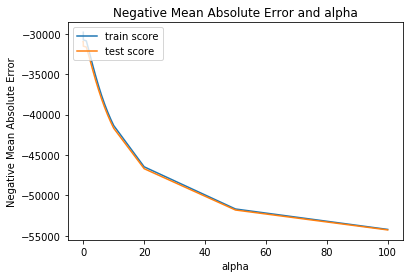

In [1440]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

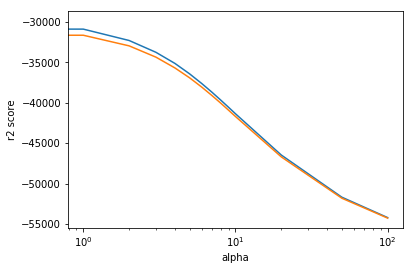

In [1441]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [1442]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
ridge.coef_

array([ 117391.99526538,  586445.96079135,  184141.15537938,
       -154336.82904101, -408103.21740151,  -48263.67486296,
        101417.73265689, -104810.73427234, -140743.08708646])

Now we should find the accuracy of the model and the coefficient determined by the alogrithm

In [1443]:
# model with optimal alpha
# lasso regression
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_new, y_train)

# predict
y_train_pred = ridge.predict(X_train_new)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
#X_test_new = X_test[X_train_new.columns]
X_test_2 = X_test[X_train_new.columns]
y_test_pred = ridge.predict(X_test_2)
print(r2_score(y_true=y_test, y_pred=y_test_pred))


0.6564609995100802
0.5862320066278379


In [1444]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_new.columns
cols = cols.insert(0, "constant")
#list(zip(cols, model_parameters))

param_df = pd.DataFrame()
param_df['Param_Name'] = cols
param_df['Coeff'] = model_parameters
param_df2 = param_df[param_df['Coeff'] != 0]
param_df2.sort_values('Coeff', ascending=False)

Param_Name       Coeff
2          1stFlrSF  586445.961
3          2ndFlrSF  184141.155
1        BsmtFinSF1  117391.995
7  RoofMatl_WdShngl  101417.733
0          constant   37291.954
6  RoofMatl_WdShake  -48263.675
8      Heating_OthW -104810.734
9    Functional_Sev -140743.087
4      KitchenAbvGr -154336.829
5   Condition2_PosN -408103.217

In [1445]:
param_df2.shape

(10, 2)

### Lasso on the tuned model after RFE

In [1446]:
# set up cross validation scheme
#folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
folds = 5
# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

Let's find out the optimal value of `alpha` for Lasso

In [1447]:
model_cv.best_params_

{'alpha': 20}

In [1448]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004787      0.003116         0.001428        0.000461      0.0001   
1       0.003328      0.000833         0.001209        0.000396       0.001   
2       0.003219      0.000526         0.001143        0.000438        0.01   
3       0.003644      0.001041         0.001355        0.000444        0.05   
4       0.003373      0.000540         0.001646        0.000455         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -28835.511764      -33673.297969      -32276.475928   
1   {'alpha': 0.001}      -28835.511449      -33673.297130      -32276.475013   
2    {'alpha': 0.01}      -28835.512514      -33673.298565      -32276.467967   
3    {'alpha': 0.05}      -28835.514401      -33673.261692      -32276.436640   
4     {'alpha': 0.1}      -28835.546609      -33673.215599      -32276.380370   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -29089.004399       ...           -30961.192087     1851.242898   
1      -29089.004097       ...           -30961.189871     1851.242686   
2      -29089.003460       ...           -30961.172075     1851.242287   
3      -29089.000982       ...           -30961.083846     1851.228388   
4      -29088.983368       ...           -30960.968631     1851.204740   

   rank_test_score  split0_train_score  split1_train_score  \
0               24       -30270.535846       -29046.176091   
1               23       -30270.538415       -29046.175626   
2               22       -30270.568172       -29046.184654   
3               21       -30270.697017       -29046.164747   
4               20       -30270.888995       -29046.139864   

   split2_train_score  split3_train_score  split4_train_score  \
0       -29933.551084       -30025.283292       -29806.684126   
1       -29933.552938       -30025.286226       -29806.689143   
2       -29933.573088       -30025.320751       -29806.741568   
3       -29933.662638       -30025.474951       -29806.974740   
4       -29933.761499       -30025.636095       -29807.250246   

   mean_train_score  std_train_score  
0     -29816.446088       413.989186  
1     -29816.448470       413.990300  
2     -29816.477647       413.997844  
3     -29816.594819       414.053048  
4     -29816.735340       414.124992  

[5 rows x 21 columns]

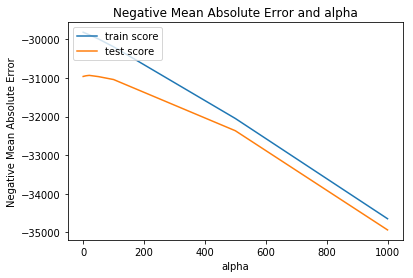

In [1449]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

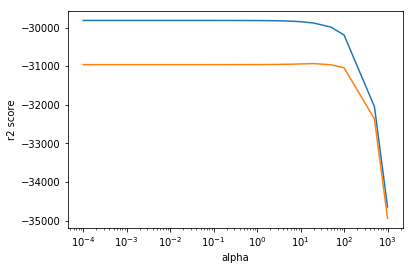

In [1450]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [1451]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=20)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
#X_test_new = X_test[X_train_new.columns]
X_test_2 = X_test[X_train_new.columns]
y_test_pred = lm.predict(X_test_2)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.6562006071576993
0.591854534734725


As we can see that the test accuracy is better for Lasso over Ridge, so let's proceed with this model and find out the coefficients.

In [1452]:
lm.coef_

array([ 115277.38202277,  583736.02500683,  182744.2604416 ,
       -152541.10095674, -389513.90334667,  -42727.7885548 ,
         97552.49785182,  -85536.75624623, -121727.76109924])

Here Lasso shrinks above mentioned coefficients. now let's visualize it based on the coefficient values

In [1453]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_new.columns
cols = cols.insert(0, "constant")
#list(zip(cols, model_parameters))

param_df = pd.DataFrame()
param_df['Param_Name'] = cols
param_df['Coeff'] = model_parameters
param_df2 = param_df[param_df['Coeff'] != 0]
param_df2.sort_values('Coeff', ascending=False)

Param_Name       Coeff
2          1stFlrSF  583736.025
3          2ndFlrSF  182744.260
1        BsmtFinSF1  115277.382
7  RoofMatl_WdShngl   97552.498
0          constant   38083.861
6  RoofMatl_WdShake  -42727.789
8      Heating_OthW  -85536.756
9    Functional_Sev -121727.761
4      KitchenAbvGr -152541.101
5   Condition2_PosN -389513.903

In [1454]:
param_df2.shape

(10, 2)

### Conclusion and Decision:

As we have seen that the accuracy of Ridge and Lasso are very close to each other. But still Lasso performs better on test data by slight percentage over Ridge. On top of that, we determined 10 features after RFE, and Lasso has been able to simply it even more by shrinking it in comparison to Ridge. So here is the final features and their respective coefficients mentioned below which we found on Lasso at optimal alpha of 20 with 65.62% accuracy on train data and 59.20% accuracy over test data.

In [1455]:
param_df2.sort_values('Coeff', ascending=False)

Param_Name       Coeff
2          1stFlrSF  583736.025
3          2ndFlrSF  182744.260
1        BsmtFinSF1  115277.382
7  RoofMatl_WdShngl   97552.498
0          constant   38083.861
6  RoofMatl_WdShake  -42727.789
8      Heating_OthW  -85536.756
9    Functional_Sev -121727.761
4      KitchenAbvGr -152541.101
5   Condition2_PosN -389513.903

#### Now, finally Let's merge the predicted sales price to actual dataframe.

In [1456]:
y_train_pred.shape

(992,)

In [1457]:
y_test_pred.shape

(468,)

In [1458]:
combined_df.shape

(1460, 249)

In [1459]:
df1 = pd.DataFrame(y_train_pred)
df1.shape

(992, 1)

In [1460]:
df2 = pd.DataFrame(y_test_pred)
df2.shape

(468, 1)

In [1461]:
df_final = pd.concat([df1, df2],axis=0)
df_final.head()

0
0   76009.588996
1  229512.752482
2  233868.785146
3  116455.827740
4  216042.274599

In [1462]:
df_final.shape

(1460, 1)

In [1463]:
df_final.index = master_df.index

In [1464]:
df_final= df_final.rename(columns={ 0 : 'Predicted_Price'})
df_final.head()

Predicted_Price
0     76009.588996
1    229512.752482
2    233868.785146
3    116455.827740
4    216042.274599

In [1465]:
master_df['Predicted_Price'] = df_final['Predicted_Price']
master_df.shape

(1460, 78)

In [1466]:
master_df.head(20)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0           60       RL         65.0     8450   Pave      Reg         Lvl   
1           20       RL         80.0     9600   Pave      Reg         Lvl   
2           60       RL         68.0    11250   Pave      IR1         Lvl   
3           70       RL         60.0     9550   Pave      IR1         Lvl   
4           60       RL         84.0    14260   Pave      IR1         Lvl   
5           50       RL         85.0    14115   Pave      IR1         Lvl   
6           20       RL         75.0    10084   Pave      Reg         Lvl   
7           60       RL         69.0    10382   Pave      IR1         Lvl   
8           50       RM         51.0     6120   Pave      Reg         Lvl   
9          190       RL         50.0     7420   Pave      Reg         Lvl   
10          20       RL         70.0    11200   Pave      Reg         Lvl   
11          60       RL         85.0    11924   Pave      IR1         Lvl   
12          20       RL         69.0    12968   Pave      IR2         Lvl   
13          20       RL         91.0    10652   Pave      IR1         Lvl   
14          20       RL         69.0    10920   Pave      IR1         Lvl   
15          45       RM         51.0     6120   Pave      Reg         Lvl   
16          20       RL         69.0    11241   Pave      IR1         Lvl   
17          90       RL         72.0    10791   Pave      Reg         Lvl   
18          20       RL         66.0    13695   Pave      Reg         Lvl   
19          20       RL         70.0     7560   Pave      Reg         Lvl   

   Utilities LotConfig LandSlope       ...       MoSold YrSold SaleType  \
0     AllPub    Inside       Gtl       ...            2   2008       WD   
1     AllPub       FR2       Gtl       ...            5   2007       WD   
2     AllPub    Inside       Gtl       ...            9   2008       WD   
3     AllPub    Corner       Gtl       ...            2   2006       WD   
4     AllPub       FR2       Gtl       ...           12   2008       WD   
5     AllPub    Inside       Gtl       ...           10   2009       WD   
6     AllPub    Inside       Gtl       ...            8   2007       WD   
7     AllPub    Corner       Gtl       ...           11   2009       WD   
8     AllPub    Inside       Gtl       ...            4   2008       WD   
9     AllPub    Corner       Gtl       ...            1   2008       WD   
10    AllPub    Inside       Gtl       ...            2   2008       WD   
11    AllPub    Inside       Gtl       ...            7   2006      New   
12    AllPub    Inside       Gtl       ...            9   2008       WD   
13    AllPub    Inside       Gtl       ...            8   2007      New   
14    AllPub    Corner       Gtl       ...            5   2008       WD   
15    AllPub    Corner       Gtl       ...            7   2007       WD   
16    AllPub   CulDSac       Gtl       ...            3   2010       WD   
17    AllPub    Inside       Gtl       ...           10   2006       WD   
18    AllPub    Inside       Gtl       ...            6   2008       WD   
19    AllPub    Inside       Gtl       ...            5   2009      COD   

   SaleCondition SalePrice  Garage_Old  Property_Age_when_sold Property_Age  \
0         Normal    208500         0.0                       5           16   
1         Normal    181500         0.0                      31           43   
2         Normal    223500         0.0                       6           17   
3        Abnorml    140000        28.0                      36           49   
4         Normal    250000         0.0                       8           19   
5         Normal    143000         0.0                      14           24   
6         Normal    307000         0.0                       2           14   
7         Normal    200000         0.0                      36           46   
8        Abnorml    129900         0.0                      58           69   
9         Normal    